In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from pandas import DataFrame
from IPython.display import HTML
%matplotlib inline

In [ ]:
def concatenate(indir = "/Users/dennisvasquez/Downloads/lc_data_files", 
                outfile = "/Users/dennisvasquez/Downloads/lc_data_files/newfile.csv"):
    os.chdir(indir)
    fileList = glob.glob("*.csv")
    dfList = []
    for filename in fileList:
        print(filename)
        df = pd.read_csv(filename,header=0, low_memory=False)
        dfList.append(df)
    concatDf = pd.concat(dfList, axis=0)
    concatDf.to_csv(outfile, index=None)

In [ ]:
%%time

concatenate();

In [2]:
%%time

lend = pd.read_csv('/Users/dennisvasquez/Downloads/lc_data_files/newfile.csv',
usecols = [
'loan_amnt',
'grade',
'int_rate',
'home_ownership',
'annual_inc',
'loan_status',
'dti',
'delinq_2yrs',
'earliest_cr_line',
'inq_last_6mths',
'open_acc',
'pub_rec',
'revol_bal',
'revol_util',
'total_acc',
'last_credit_pull_d',
'collections_12_mths_ex_med',
'acc_now_delinq',
'tot_cur_bal',
'total_rev_hi_lim',
'acc_open_past_24mths',
'avg_cur_bal',
'bc_open_to_buy',
'bc_util',
'chargeoff_within_12_mths',
'delinq_amnt',
'mo_sin_old_il_acct',
'mo_sin_old_rev_tl_op',
'mo_sin_rcnt_rev_tl_op',
'mo_sin_rcnt_tl',
'mort_acc',
'mths_since_recent_bc',
'mths_since_recent_inq',
'num_accts_ever_120_pd',
'num_actv_bc_tl',
'num_actv_rev_tl',
'num_bc_sats',
'num_bc_tl',
'num_il_tl',
'num_op_rev_tl',
'num_rev_accts',
'num_rev_tl_bal_gt_0',
'num_sats',
'num_tl_120dpd_2m',
'num_tl_30dpd',
'num_tl_90g_dpd_24m',
'num_tl_op_past_12m',
'pct_tl_nvr_dlq',
'percent_bc_gt_75',
'pub_rec_bankruptcies',
'tax_liens',
'tot_hi_cred_lim',
'total_bal_ex_mort',
'total_bc_limit',
'total_il_high_credit_limit'], low_memory=True)

CPU times: user 28.1 s, sys: 4.58 s, total: 32.7 s
Wall time: 42.8 s


In [3]:
lend.sample(5)

,loan_amnt,int_rate,grade,home_ownership,annual_inc,loan_status,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
661283,10000,15.61%,D,MORTGAGE,54000.0,Current,27.07,0,Nov-03,0.0,...,0.0,2.0,80.0,66.7,0.0,0.0,198530.0,55114.0,4300.0,65700.0
107457,15500,15.22%,C,RENT,45000.0,Fully Paid,24.19,0,May-98,0.0,...,0.0,0.0,95.0,50.0,0.0,0.0,96601.0,83418.0,22400.0,72701.0
175070,15600,10.16%,B,RENT,104000.0,Fully Paid,10.40,0,May-94,0.0,...,0.0,0.0,80.0,50.0,0.0,0.0,49070.0,30142.0,22200.0,20270.0
541186,21000,13.67%,C,MORTGAGE,95000.0,Current,10.21,0,Sep-03,0.0,...,0.0,1.0,95.2,50.0,0.0,0.0,443607.0,72147.0,2700.0,64635.0
1015666,7000,6.99%,A,MORTGAGE,75000.0,Current,11.01,0,Mar-81,1.0,...,0.0,3.0,100.0,40.0,0.0,0.0,174210.0,19975.0,18000.0,14451.0


In [4]:
lend.shape

(1319098, 55)

In [5]:
lend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319098 entries, 0 to 1319097
Data columns (total 55 columns):
loan_amnt                     1319098 non-null int64
int_rate                      1319098 non-null object
grade                         1319098 non-null object
home_ownership                1319098 non-null object
annual_inc                    1319098 non-null float64
loan_status                   1319098 non-null object
dti                           1319098 non-null float64
delinq_2yrs                   1319098 non-null int64
earliest_cr_line              1319098 non-null object
inq_last_6mths                1319097 non-null float64
open_acc                      1319098 non-null int64
pub_rec                       1319098 non-null int64
revol_bal                     1319098 non-null int64
revol_util                    1318372 non-null object
total_acc                     1319098 non-null int64
last_credit_pull_d            1319026 non-null object
collections_12_mths_ex_med

In [6]:
lend.duplicated().value_counts()

False    1319097
True           1
dtype: int64

In [7]:
lend.drop_duplicates();

In [8]:
lend.loan_status.value_counts()

Current               761705
Fully Paid            417167
Charged Off           105071
Late (31-120 days)     19329
In Grace Period        11253
Late (16-30 days)       4032
Default                  541
Name: loan_status, dtype: int64

In [9]:
lend = lend[lend.loan_status != 'Current']

In [10]:
lend.shape

(557393, 55)

In [11]:
lend.isnull().sum()

loan_amnt                         0
int_rate                          0
grade                             0
home_ownership                    0
annual_inc                        0
loan_status                       0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      349
total_acc                         0
last_credit_pull_d               31
collections_12_mths_ex_med       56
acc_now_delinq                    0
tot_cur_bal                   66770
total_rev_hi_lim              66770
acc_open_past_24mths          47185
avg_cur_bal                   66782
bc_open_to_buy                52409
bc_util                       52742
chargeoff_within_12_mths         56
delinq_amnt                       0
mo_sin_old_il_acct            81651
mo_sin_old_rev_tl_op        

In [12]:
lend = lend[pd.notnull(lend.tot_cur_bal)]

In [13]:
lend = lend[pd.notnull(lend.mo_sin_old_il_acct)]

In [14]:
lend = lend[pd.notnull(lend.mths_since_recent_inq)]

In [15]:
lend = lend[pd.notnull(lend.num_tl_120dpd_2m)]

In [16]:
lend = lend[pd.notnull(lend.bc_util)]

In [17]:
lend = lend[pd.notnull(lend.pct_tl_nvr_dlq)]

In [18]:
lend = lend[pd.notnull(lend.last_credit_pull_d)]

In [19]:
lend = lend[pd.notnull(lend.mths_since_recent_bc)]

In [20]:
lend = lend[pd.notnull(lend.num_rev_accts)]

In [21]:
lend.isnull().any()

loan_amnt                     False
int_rate                      False
grade                         False
home_ownership                False
annual_inc                    False
loan_status                   False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths                False
open_acc                      False
pub_rec                       False
revol_bal                     False
revol_util                    False
total_acc                     False
last_credit_pull_d            False
collections_12_mths_ex_med    False
acc_now_delinq                False
tot_cur_bal                   False
total_rev_hi_lim              False
acc_open_past_24mths          False
avg_cur_bal                   False
bc_open_to_buy                False
bc_util                       False
chargeoff_within_12_mths      False
delinq_amnt                   False
mo_sin_old_il_acct            False
mo_sin_old_rev_tl_op        

In [22]:
lend.shape

(416330, 55)

In [23]:
from datetime import *
from dateutil.relativedelta import *
import calendar

TODAY = date.today()

#lend.earliest_cr_line = pd.to_datetime(lend.earliest_cr_line)
#lend['oldest_cr_days'] = TODAY - lend.earliest_cr_line

#lend = lend.drop('earliest_cr_line', axis=1);

In [24]:
lend.loc[:, 'revol_util'] = lend['revol_util'].str.split('%').apply(lambda x: x[0])
lend['revol_util'] = lend['revol_util'].astype(float)

In [25]:
lend = lend[lend['bc_util'] <= 100]
lend = lend[lend['dti'] <= 100]
lend = lend[lend['revol_util'] <= 100]

In [26]:
lend.avg_cur_bal = lend.avg_cur_bal.replace('0', 1)
lend['log_avg_cur_bal'] = lend.avg_cur_bal.copy()
lend.log_avg_cur_bal = np.log(lend.avg_cur_bal)

lend.bc_open_to_buy = lend.bc_open_to_buy.replace('0', 1)
lend['log_bc_open_to_buy'] = lend.bc_open_to_buy.copy()
lend.log_bc_open_to_buy = np.log(lend.bc_open_to_buy)

lend.delinq_amnt = lend.delinq_amnt.replace('0', 1)
lend['log_delinq_amnt'] = lend.delinq_amnt.copy()
lend.log_delinq_amnt = np.log(lend.delinq_amnt)

lend.total_bal_ex_mort = lend.total_bal_ex_mort.replace('0', 1)
lend['log_total_bal_ex_mort'] = lend.total_bal_ex_mort.copy()
lend.log_total_bal_ex_mort = np.log(lend.total_bal_ex_mort)

lend.total_il_high_credit_limit = lend.total_il_high_credit_limit.replace('0', 1)
lend['log_total_il_high_credit_limit'] = lend.total_il_high_credit_limit.copy()
lend.log_total_il_high_credit_limit = np.log(lend.total_il_high_credit_limit)

lend.annual_inc = lend.annual_inc.replace('0', 1)
lend['log_annual_inc'] = lend.annual_inc.copy()
lend.log_annual_inc = np.log(lend.annual_inc)

lend.tot_cur_bal = lend.tot_cur_bal.replace('0', 1)
lend['log_tot_cur_bal'] = lend.tot_cur_bal.copy()
lend.log_tot_cur_bal = np.log(lend.tot_cur_bal)

lend.revol_bal = lend.revol_bal.replace('0', 1)
lend['log_revol_bal'] = lend.revol_bal.copy()
lend.log_revol_bal = np.log(lend.revol_bal)

lend['log_total_rev_hi_lim'] = lend.total_rev_hi_lim.copy()
lend.log_total_rev_hi_lim = np.log(lend.total_rev_hi_lim)

lend['tot_hi_cred_lim'] = lend.tot_hi_cred_lim.copy()
lend.log_tot_hi_cred_lim = np.log(lend.tot_hi_cred_lim)

lend['log_total_bc_limit'] = lend.total_bc_limit.copy()
lend.log_total_bc_limit = np.log(lend.total_bc_limit)

In [27]:
lend.home_ownership.value_counts()

MORTGAGE    212466
RENT        155411
OWN          40017
OTHER           35
NONE            28
ANY              5
Name: home_ownership, dtype: int64

In [28]:
lend = lend[lend.home_ownership != 'OTHER']
lend = lend[lend.home_ownership != 'NONE']
lend = lend[lend.home_ownership != 'ANY']
lend_home = pd.get_dummies(lend['home_ownership'],prefix='home',drop_first=True)
lend = pd.concat([lend, lend_home], axis=1)
lend = lend.drop('home_ownership', axis=1)

In [29]:
lend['grade_ord'] = lend.grade.map({'A': 1,
                                    'B': 2,
                                    'C': 3,
                                    'D': 4,
                                    'E': 5,
                                    'F': 6,
                                    'G': 7})

lend = lend.drop('grade', axis=1)

In [30]:
lend.loan_status.value_counts()

Fully Paid            299945
Charged Off            79212
Late (31-120 days)     15926
In Grace Period         9099
Late (16-30 days)       3264
Default                  448
Name: loan_status, dtype: int64

In [31]:
lend['status_group'] = lend.loan_status.map({
    'Fully Paid': 0,
    'Charged Off': 1,
    'Late (31-120 days)': 1,
    'In Grace Period': 1,
    'Late (16-30 days)': 1,
    'Default': 1,})

lend = lend.drop('loan_status', axis=1)

In [32]:
lend.sample(5)

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,...,log_total_il_high_credit_limit,log_annual_inc,log_tot_cur_bal,log_revol_bal,log_total_rev_hi_lim,log_total_bc_limit,home_OWN,home_RENT,grade_ord,status_group
427277,7250,24.50%,28000.0,27.44,2,Sep-09,2.0,15,0,2418,...,10.263432,10.239960,9.991590,7.790696,9.375855,7.377759,0,1,6,1
360106,20975,20.99%,50000.0,30.47,0,Dec-92,0.0,17,0,18290,...,10.129467,10.819778,10.577121,9.814110,10.271597,9.686575,0,1,5,0
952799,24000,11.99%,110000.0,7.10,1,Apr-05,1.0,10,0,9823,...,10.054275,11.608236,12.393133,9.192482,10.537415,10.221941,0,0,3,0
120924,27575,21.49%,85000.0,9.12,0,Mar-98,1.0,6,1,6037,...,9.907280,11.350407,12.571125,8.705662,8.974618,8.101678,0,0,5,1
445335,10000,14.98%,36000.0,20.67,1,Apr-96,1.0,25,1,10043,...,11.939199,10.491274,12.082526,9.214631,10.146434,9.472705,0,1,3,0


In [ ]:
%%time

lend.to_csv('lend.csv')

In [ ]:
lend = pd.read_csv('lend.csv')

In [ ]:
lend = lend.drop('Unnamed: 0', axis=1);

In [ ]:
lend.sample(5)

In [33]:
lend.delinq_amnt = lend.delinq_amnt.replace('0', 1)
lend['log_delinq_amnt'] = lend.delinq_amnt.copy()
lend.log_delinq_amnt = np.log(lend.delinq_amnt)

In [ ]:
## a = lend.dtypes
HTML(DataFrame(a).to_html())

In [ ]:
# fit a logistic regression model and store the predicted probabilites of class 1
logreg = LogisticRegression(C=1e9)
feature_cols = ['bc_util']
X = lend[feature_cols]
y = lend.status_group
logreg.fit(X, y)

In [ ]:
lend['status_group_pred_prob'] = logreg.predict_proba(X)[:, 1]

In [ ]:
# plot the predicted probabilities again
plt.scatter(lend.bc_util, lend.status_group)
#plt.plot(lend.bc_util, lend.status_group_pred_prob, color='red')
plt.xlabel('bc_util')
plt.ylabel('status_group');

In [ ]:
#lend = lend[((lend.total_acc - lend.total_acc.mean()) / lend.total_acc.std()).abs() < 4]

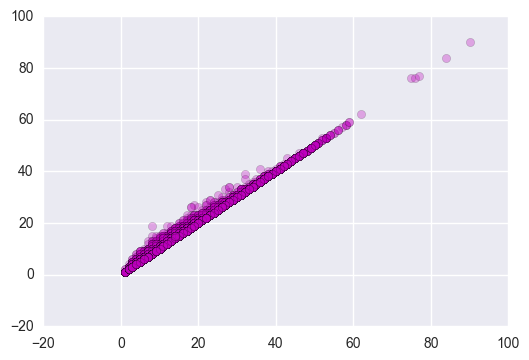

In [34]:
plt.scatter(lend.num_sats, lend.open_acc, s=35, c='m', alpha=.3);

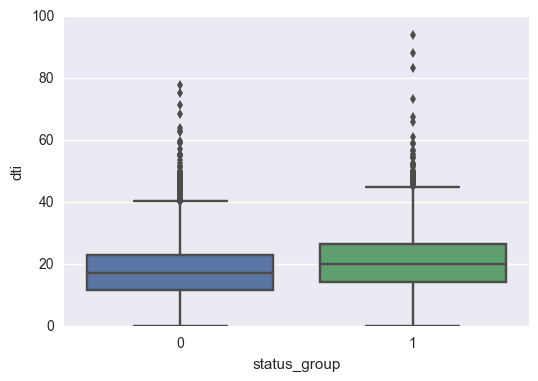

In [35]:
sns.boxplot(x='status_group', y='dti',data = lend);

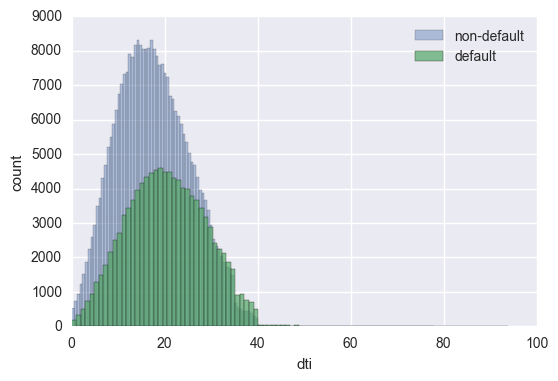

In [36]:
plt.hist(lend[lend['status_group']==0]['dti'].reset_index(drop=True),alpha=0.4,bins='rice', label='non-default')
plt.hist(lend[lend['status_group']==1]['dti'].reset_index(drop=True),alpha=0.7,bins='rice', label='default')
plt.title('')
plt.xlabel('dti')
plt.ylabel('count')
plt.legend()
plt.show();

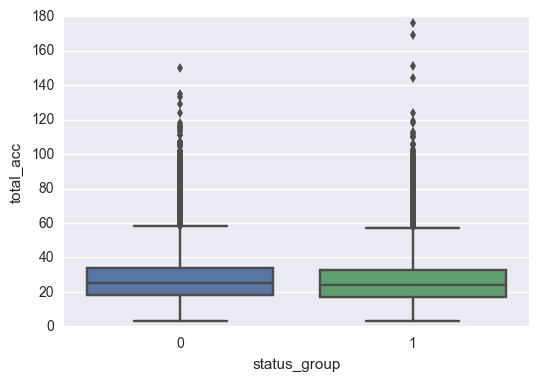

In [37]:
sns.boxplot(x='status_group', y='total_acc',data = lend);

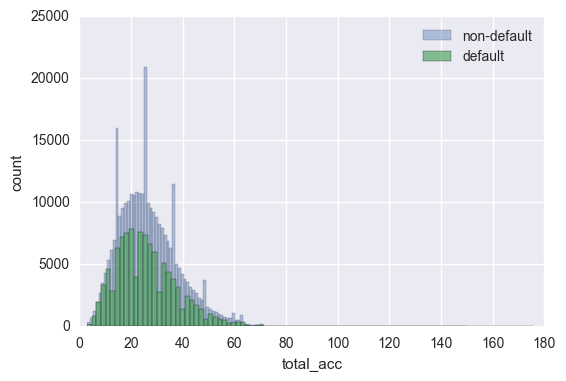

In [38]:
plt.hist(lend[lend['status_group']==0]['total_acc'].reset_index(drop=True),alpha=0.4,bins='rice', label='non-default')
plt.hist(lend[lend['status_group']==1]['total_acc'].reset_index(drop=True),alpha=0.7,bins='rice', label='default')
plt.title('')
plt.xlabel('total_acc')
plt.ylabel('count')
plt.legend()
plt.show();

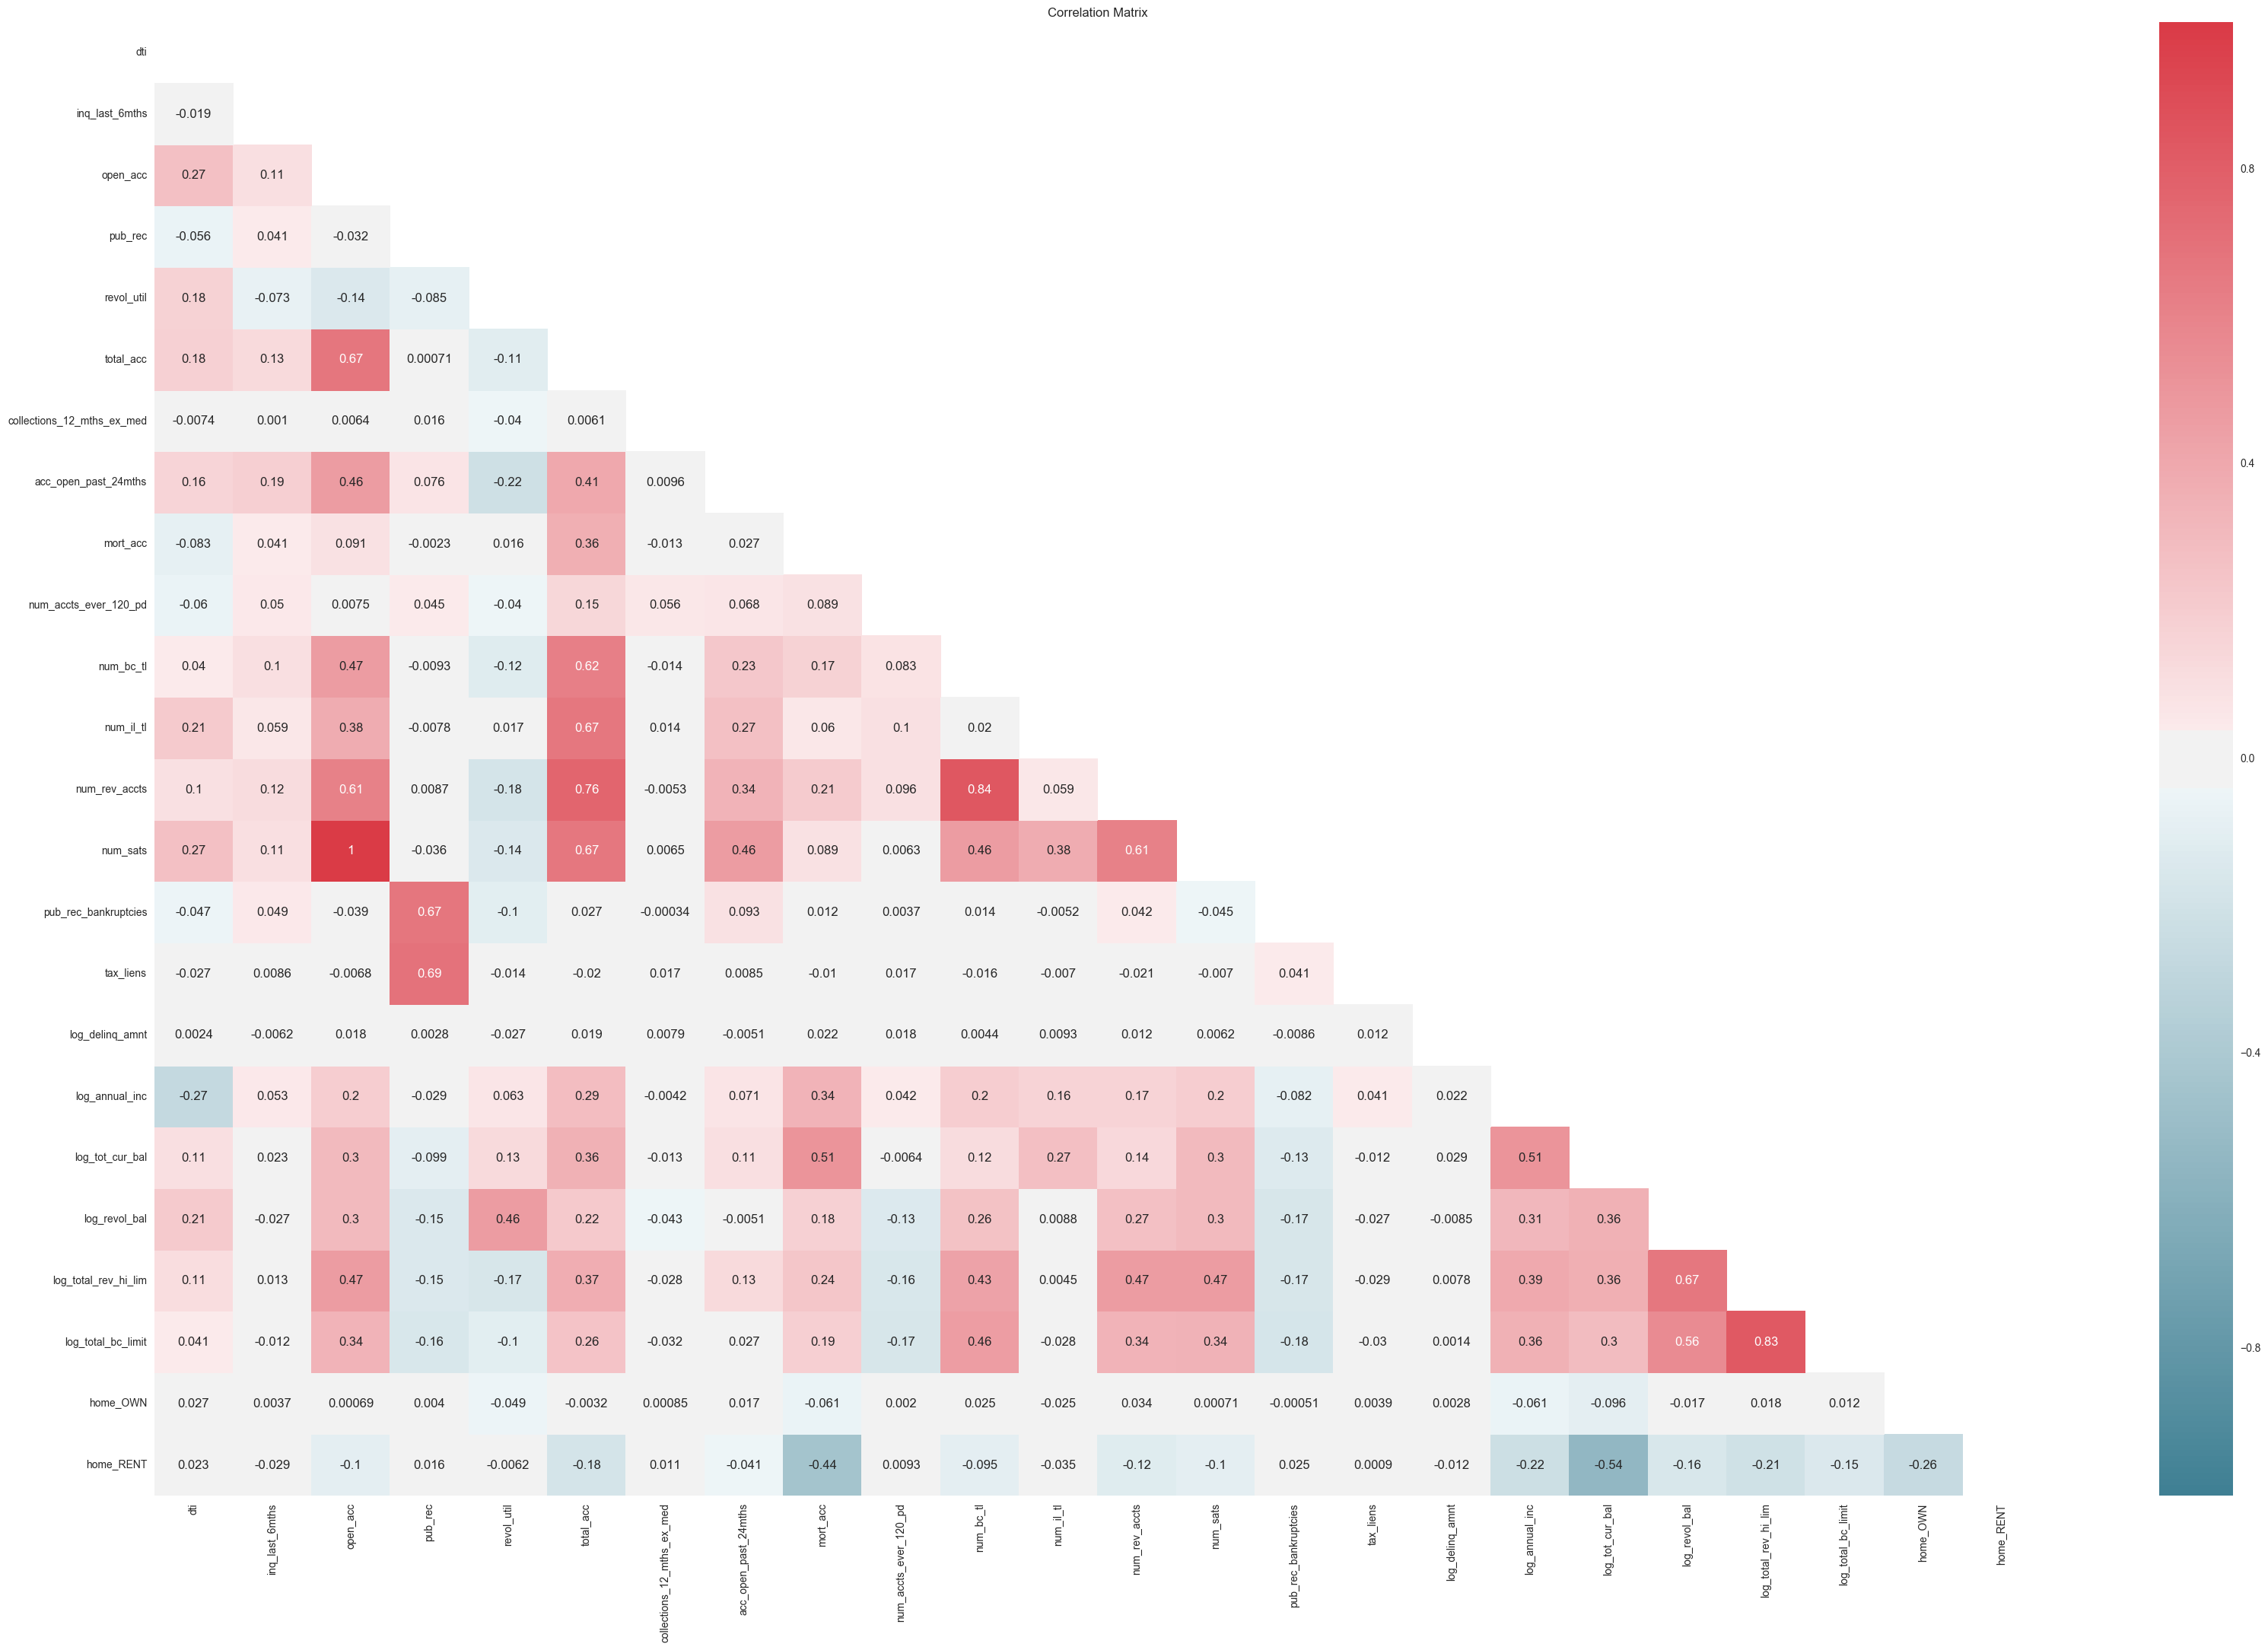

In [42]:
corr = X.corr()

sns.set(style="white")
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(40, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, linewidths=0, vmax=1, ax=ax , annot=True)
ax.set_title('Correlation Matrix');

In [43]:
df = pd.DataFrame(X)
c = df.corr()
s = c.unstack().drop_duplicates()
so = s.sort_values(ascending=False)

HTML(DataFrame(so).to_html())

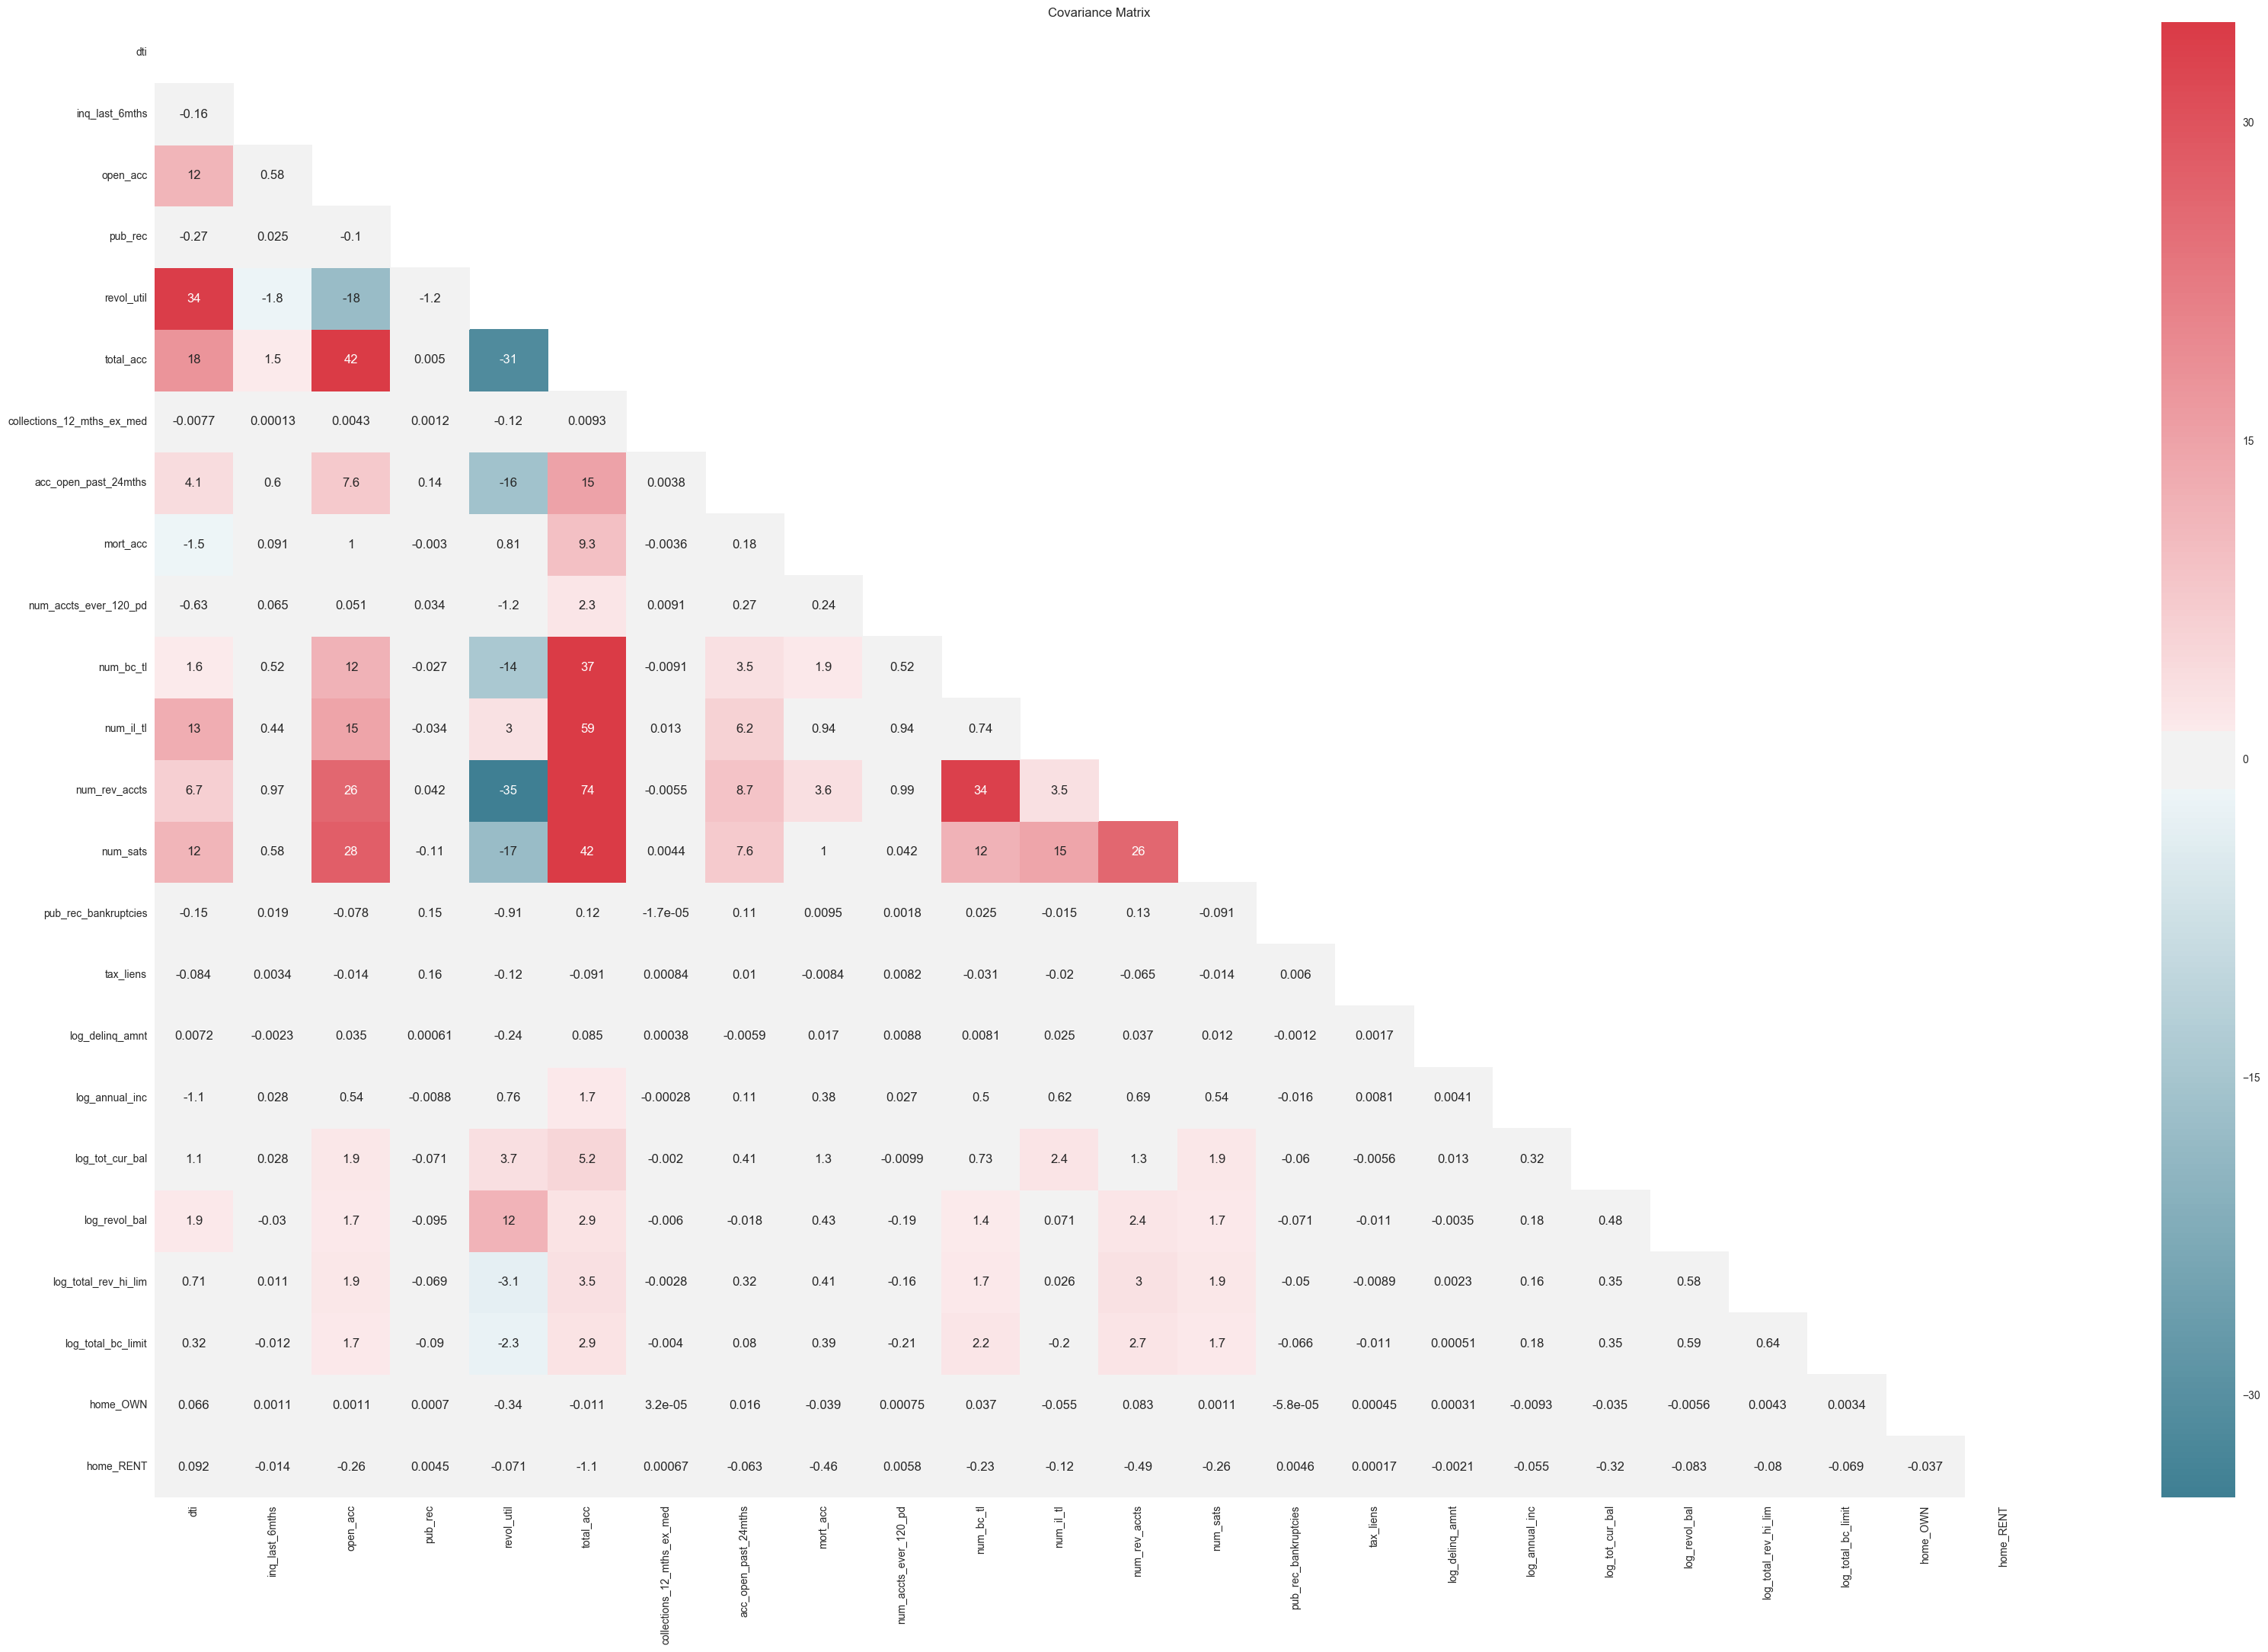

In [44]:
cov = X.cov()

sns.set(style="white")
mask = np.zeros_like(cov, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(40, 25))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cov, mask=mask, cmap=cmap, linewidths=0, vmax=1, ax=ax , annot=True)
ax.set_title('Covariance Matrix');

In [45]:
df = pd.DataFrame(X)
c = df.cov()
s = c.unstack().drop_duplicates()
so = s.sort_values(ascending=False)

HTML(DataFrame(so).to_html())

In [ ]:
#lend[lend.loc[0:10].status_group == 0];

In [ ]:
lend.shape

In [ ]:
# 0 = 299,945
# 1 = 107,949
# 35.98%
lend.status_group.value_counts()

In [ ]:
#sns.boxplot(lend.total_rev_hi_lim);
#plt.scatter(lend.dti, lend.status_group, s=35, c='m', alpha=.3);
#plt.hist(lend.total_rev_hi_lim, alpha=.3);
#sns.distplot(lend.annual_inc);
#lend.annual_inc.dropna(inplace=True);

In [ ]:
lend.shape

In [ ]:
lend.shape

In [41]:
lr_features = [
#'loan_amnt',
#'grade_ord',
'dti',                               
#'delinq_2yrs',                         
'inq_last_6mths',                    
'open_acc',                            
'pub_rec',                                                        
'revol_util',                        
'total_acc',                           
'collections_12_mths_ex_med',        
#'acc_now_delinq',                                        
'acc_open_past_24mths',              
#'bc_util',                           
#'chargeoff_within_12_mths',          
#c'mo_sin_old_il_acct',                
#c'mo_sin_old_rev_tl_op',              
#c'mo_sin_rcnt_rev_tl_op',             
#c'mo_sin_rcnt_tl',                    
'mort_acc',                          
#c'mths_since_recent_bc',              
#c'mths_since_recent_inq',             
'num_accts_ever_120_pd',
#c'num_actv_bc_tl',
#c'num_actv_rev_tl',
#c'num_bc_sats',
'num_bc_tl',
'num_il_tl',
#'num_op_rev_tl',                     
'num_rev_accts',                     
#c'num_rev_tl_bal_gt_0',               
'num_sats',                          
#'num_tl_120dpd_2m',                  
#c'num_tl_30dpd',                      
#'num_tl_90g_dpd_24m',                
#c'num_tl_op_past_12m',                
#c'pct_tl_nvr_dlq',                    
#c'percent_bc_gt_75',                  
'pub_rec_bankruptcies',              
'tax_liens',                         
#c'tot_hi_cred_lim',                   
#'log_avg_cur_bal',                   
#c'log_bc_open_to_buy',                
'log_delinq_amnt',                   
#'log_total_bal_ex_mort',             
#'log_total_il_high_credit_limit',    
'log_annual_inc',                    
'log_tot_cur_bal',                   
'log_revol_bal',                     
'log_total_rev_hi_lim',              
'log_total_bc_limit',                
'home_OWN',                            
'home_RENT'
]

X = lend[lr_features]
y = lend.status_group

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

In [47]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept = True, penalty='l2', C=1)

In [48]:
logreg.fit(X_train_scale, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
coef = pd.DataFrame({'coefficients': logreg.coef_[0],'features': X.columns})
print(coef)

    coefficients                    features
0       0.318823                         dti
1       0.074545              inq_last_6mths
2      -0.123356                    open_acc
3       0.096368                     pub_rec
4       0.220887                  revol_util
5      -0.123475                   total_acc
6       0.052433  collections_12_mths_ex_med
7       0.233178        acc_open_past_24mths
8      -0.061221                    mort_acc
9       0.054892       num_accts_ever_120_pd
10     -0.042512                   num_bc_tl
11     -0.045239                   num_il_tl
12     -0.014370               num_rev_accts
13      0.254354                    num_sats
14     -0.057480        pub_rec_bankruptcies
15     -0.012855                   tax_liens
16      0.034261             log_delinq_amnt
17      0.027786              log_annual_inc
18     -0.123322             log_tot_cur_bal
19     -0.035753               log_revol_bal
20      0.002487        log_total_rev_hi_lim
21     -0.

In [50]:
coef_ord = coef.coefficients.sort_values(ascending=False)
coef_ord

0     0.318823
13    0.254354
7     0.233178
4     0.220887
3     0.096368
23    0.076784
1     0.074545
9     0.054892
6     0.052433
16    0.034261
22    0.029087
17    0.027786
20    0.002487
15   -0.012855
12   -0.014370
19   -0.035753
10   -0.042512
11   -0.045239
14   -0.057480
8    -0.061221
18   -0.123322
2    -0.123356
5    -0.123475
21   -0.124887
Name: coefficients, dtype: float64

In [51]:
y_pred_class = logreg.predict(X_test_scale)

In [52]:
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.737285974856


In [53]:
from sklearn.model_selection import cross_val_score
#scores = cross_val_score(logreg, X, y, scoring='accuracy', cv=5)
print('CV Accuracy {}, Average Accuracy {}'.format(scores, scores.mean()))

NameError: name 'scores' is not defined

In [54]:
# 35.98% are defaulted loans
print("Baseline Null Accuracy Score:")
print(lend.status_group.value_counts())

Baseline Null Accuracy Score:
0    299945
1    107949
Name: status_group, dtype: int64


In [55]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred_class)
print(confusion)

[[73729  1126]
 [25664  1455]]


* TP: 1,812 = we predicted yes they are defaults (will perform bad), and they were actual defaults (performed bad).
* TN: 36,852 = we predicted no they're not defaults (will perform good), and they were not defaults (performed good).
* FP: 1,533 = we predicted yes they are defaults (will perform bad), but they were not actual defaults (performed good) (Type I error).
* FN: 12,178 = we predicted no they're not defaults (will perform good), and they were defaults (they performed bad) (Type II error).

**Specificity**: When it's actually not a default, how often does it predict a non-default?
TN/actual no

**Recall or Sensitivity**: When it's actually a default, how often does it predict a default?
TP/actual yes

**Precision**: When it predicts a default, how often is it correct?
TP/predicted yes

**F1 Score** = 2*((precision x sensitivity)/(precision + sensitivity))

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class, target_names=["non-default", "default"]))

             precision    recall  f1-score   support

non-default       0.74      0.98      0.85     74855
    default       0.56      0.05      0.10     27119

avg / total       0.69      0.74      0.65    101974



In [57]:
from sklearn.metrics import roc_auc_score
logreg_auc = roc_auc_score(y_test, logreg.predict_proba(X_test_scale)[:, 1])
print("AUC for Logistic Regression: {:.3f}".format(logreg_auc))

AUC for Logistic Regression: 0.652


In [58]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y)

rf = RandomForestClassifier(n_estimators = 200, max_features='sqrt', class_weight="balanced")

In [59]:
%%time

rf.fit(X_train, y_train)

CPU times: user 4min 44s, sys: 7.37 s, total: 4min 51s
Wall time: 5min 36s


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

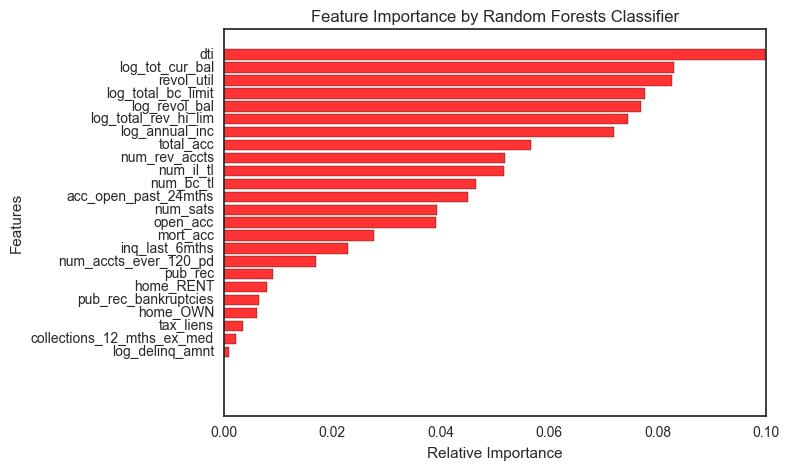

In [60]:
importance_list = rf.feature_importances_
name_list = X_train.columns
importance_list, name_list = zip(*sorted(zip(importance_list[:25], name_list[:25])))

plt.figure(figsize=(7, 5))
plt.barh(range(len(name_list)),importance_list,align='center', color = 'red', alpha = 0.8)
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.title('Feature Importance by Random Forests Classifier');

In [61]:
y_pred_rf_class = rf.predict(X_test)

In [ ]:
%%time

from sklearn.model_selection import cross_val_score
#scores = cross_val_score(rf, X, y, scoring='accuracy')
print('CV Accuracy {}, Average Accuracy {}'.format(scores, scores.mean()))

#for n_trees in range(1, 100, 25):
    #model = RandomForestClassifier(n_estimators = n_trees)
    #scores = cross_val_score(model, X, y, scoring='accuracy')
    #print('n trees: {}, CV accuracy {}, Average accuracy {}'.format(n_trees, scores, scores.mean()))

In [62]:
confusion = confusion_matrix(y_test, y_pred_rf_class)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[74123  1016]
 [25543  1292]]


In [63]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf_class, target_names=["non-default", "default"]))

             precision    recall  f1-score   support

non-default       0.74      0.99      0.85     75139
    default       0.56      0.05      0.09     26835

avg / total       0.70      0.74      0.65    101974



In [64]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
print("AUC for Random Forests: {:.3f}".format(rf_auc))

AUC for Random Forests: 0.650
